# Testing Notebook

## I. Import Functions and the Option Class

In [26]:
from options import *
import numpy as np
from datetime import datetime

## II. Set Parameters

In [27]:
# Option variables.
spot0 = 100
call_strike = 100
put_strike = 100
r = 0.05
vol = 0.2
start_date = datetime(year=2022, month=1, day=1)
expire_date = datetime(year=2023, month=1, day=1)
year_delta = (expire_date - start_date).days / 365

## III. Test Monte Carlo Pricing (Geometric Brownian Motion)

In [28]:
# Monte Carlo pricing variables.
steps = 50
num_paths = 1000
anti_paths = True
mo_match = True
save_paths = True
seed = 100
calc_greeks = True

american_call = Option('call', spot0, call_strike, r, vol, 'american', year_delta,)
american_put = Option('put', spot0, put_strike, r, vol, 'american', year_delta,)
european_call = Option('call', spot0, call_strike, r, vol, 'european', year_delta,)
european_put = Option('put', spot0, put_strike, r, vol, 'european', year_delta,)

am_call_val = american_call.value_option('mc', steps=steps, num_paths=num_paths, anti_paths=anti_paths, 
                                         mo_match=mo_match, save_paths=save_paths, seed=seed, 
                                         calc_greeks=calc_greeks)
am_put_val = american_put.value_option('mc', steps=steps, num_paths=num_paths, anti_paths=anti_paths, 
                                         mo_match=mo_match, save_paths=save_paths, seed=seed, 
                                         calc_greeks=calc_greeks)
eur_call_val = european_call.value_option('mc', steps=steps, num_paths=num_paths, anti_paths=anti_paths, 
                                         mo_match=mo_match, save_paths=save_paths, seed=seed, 
                                         calc_greeks=calc_greeks)
eur_put_val = european_put.value_option('mc', steps=steps, num_paths=num_paths, anti_paths=anti_paths, 
                                         mo_match=mo_match, save_paths=save_paths, seed=seed, 
                                         calc_greeks=calc_greeks)

print(f'American Call Value: ${round(am_call_val, 2)}')
print(f'American Put Value: ${round(am_put_val, 2)}')
print(f'European Call Value: ${round(eur_call_val, 2)}')
print(f'European Put Value: ${round(eur_put_val, 2)}')

American Call Value: $10.25
American Put Value: $5.81
European Call Value: $10.05
European Put Value: $5.32


In [29]:
print(f'American Call Greeks: {american_call.greeks()}')

American Call Greeks: {'delta': 0.6382875911983277, 'theta': -6.676156774489073, 'rho': 55.8598521710163, 'vega': 35.980085082582214, 'gamma': 0.02001191526565268}


In [30]:
print(f'American Put Greeks: {american_put.greeks()}')

American Put Greeks: {'delta': -0.36199727105490354, 'theta': -1.3870780120335269, 'rho': -46.885093027668745, 'vega': 67.30979252568004, 'gamma': 0.021385428926960277}


In [31]:
print(f'European Call Greeks: {european_call.greeks()}')

European Call Greeks: {'delta': 0.6388814979532143, 'theta': -6.181156245088637, 'rho': 53.83958551645307, 'vega': 34.88359035206923, 'gamma': 0.02024666549590818}


In [32]:
print(f'European Put Greeks: {european_put.greeks()}')

European Put Greeks: {'delta': -0.3596294273728873, 'theta': -1.5732315978369549, 'rho': -41.283357092125605, 'vega': 36.36581478622824, 'gamma': 0.0202466654955843}


## IV. Plotting Simulated Paths

In [33]:
# Monte Carlo pricing variables.
steps = 48
num_paths = 100
anti_paths = True
mo_match = True
save_paths = True

american_call = Option('call', spot0, call_strike, r, vol, 'american', year_delta)
american_put = Option('put', spot0, put_strike, r, vol, 'american', year_delta)
european_call = Option('call', spot0, call_strike, r, vol, 'european', year_delta)
european_put = Option('put', spot0, put_strike, r, vol, 'european', year_delta)

am_call_val = american_call.value_option('mc', steps=steps, num_paths=num_paths, 
                                         anti_paths=anti_paths, mo_match=mo_match, save_paths=save_paths,
                                         calc_greeks=False)
am_put_val = american_put.value_option('mc', steps=steps, num_paths=num_paths, 
                                       anti_paths=anti_paths, mo_match=mo_match, save_paths=save_paths,
                                       calc_greeks=False)
eur_call_val = european_call.value_option('mc', steps=steps, num_paths=num_paths, 
                                          anti_paths=anti_paths, mo_match=mo_match, save_paths=save_paths,
                                          calc_greeks=False)
eur_put_val = european_put.value_option('mc', steps=steps, num_paths=num_paths, 
                                         anti_paths=anti_paths, mo_match=mo_match, save_paths=save_paths,
                                         calc_greeks=False)

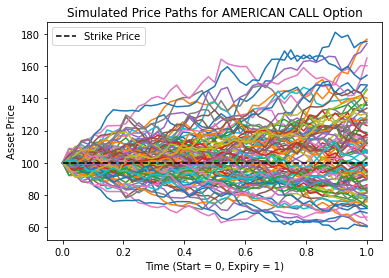

In [34]:
plot_sim_paths(steps, american_call, linestyles='dashed', color='k', label='Strike Price')

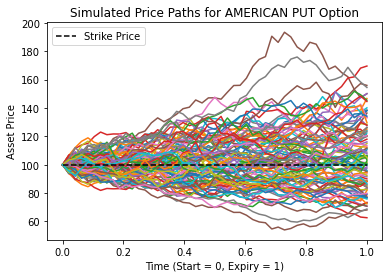

In [35]:
plot_sim_paths(steps, american_put, linestyles='dashed', color='k', label='Strike Price')

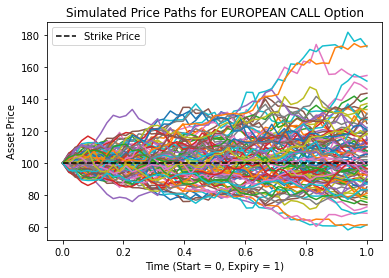

In [36]:
plot_sim_paths(steps, european_call, linestyles='dashed', color='k', label='Strike Price')

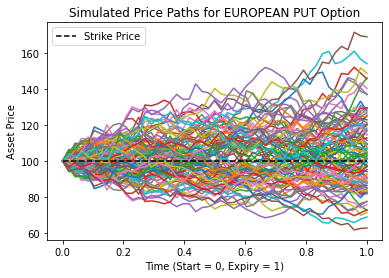

In [37]:
plot_sim_paths(steps, european_put, linestyles='dashed', color='k', label='Strike Price')

## V. Plotting Option Values vs Strike Prices

In [38]:
strike_delta = 20
# Monte Carlo pricing variables.
steps = 48
num_paths = 5000
anti_paths = True
mo_match = True
save_paths = True

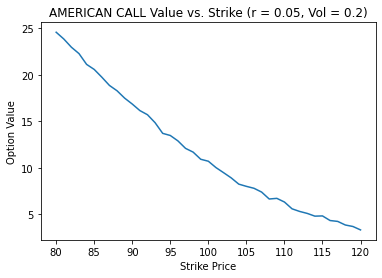

In [39]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='call', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='american',
                     year_delta=year_delta,
                     method='mc',
                     steps=steps,
                     num_paths=num_paths,
                     anti_paths=anti_paths,
                     mo_match=mo_match,
                     calc_greeks=False
                    )

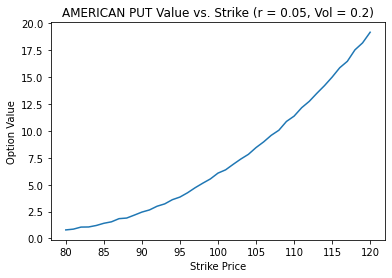

In [40]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='put', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='american',
                     year_delta=year_delta,
                     method='mc',
                     steps=steps,
                     num_paths=num_paths,
                     anti_paths=anti_paths,
                     mo_match=mo_match,
                     calc_greeks=False
                    )

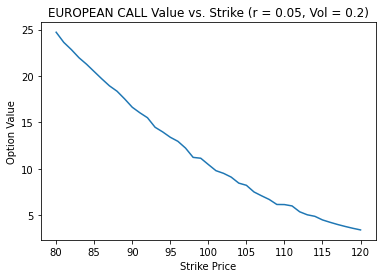

In [41]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='call', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='european',
                     year_delta=year_delta,
                     method='mc',
                     steps=steps,
                     num_paths=num_paths,
                     anti_paths=anti_paths,
                     mo_match=mo_match,
                     calc_greeks=False
                    )

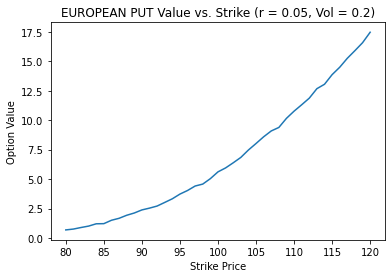

In [42]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='put', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='european',
                     year_delta=year_delta,
                     method='mc',
                     steps=steps,
                     num_paths=num_paths,
                     anti_paths=anti_paths,
                     mo_match=mo_match,
                     calc_greeks=False
                    )

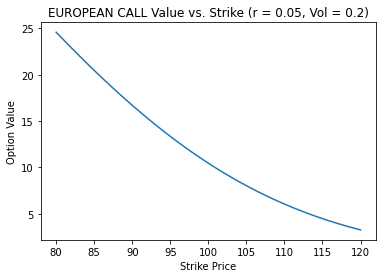

In [43]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='call', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='european',
                     year_delta=year_delta,
                     method='bs'
                    )

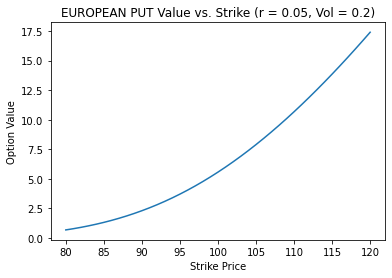

In [44]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='put', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='european',
                     year_delta=year_delta,
                     method='bs'
                    )

# Black-Scholes Testing

In [45]:
bs_eur_call_val = european_call.value_option('bs')
bs_eur_put_val = european_put.value_option('bs')

In [46]:
print(f'European Call Value (BS): ${round(bs_eur_call_val, 2)}')
print(f'Greeks(BS): {european_call.greeks()}')

European Call Value (BS): $10.45
Greeks(BS): {'delta': 0.6368306511756191, 'theta': -6.414027546438197, 'rho': 53.232481545376345, 'vega': 37.52403469169379, 'gamma': 0.018762017345846895}


In [47]:
print(f'European Put Value (BS): ${round(bs_eur_put_val, 2)}')
print(f'Greeks (BS): {european_put.greeks()}')

European Put Value (BS): $5.57
Greeks (BS): {'delta': -0.3631693488243809, 'theta': -1.657880423934626, 'rho': -41.89046090469506, 'vega': 37.52403469169379, 'gamma': 0.018762017345846895}


In [48]:
eur_call_val = european_call.value_option('mc', steps=steps, num_paths=num_paths, anti_paths=anti_paths, 
                                         mo_match=mo_match, save_paths=save_paths, seed=seed, 
                                         calc_greeks=True)
eur_put_val = european_put.value_option('mc', steps=steps, num_paths=num_paths, anti_paths=anti_paths, 
                                         mo_match=mo_match, save_paths=save_paths, seed=seed, 
                                         calc_greeks=True)

In [49]:
print(f'European Call Value (MC): ${round(european_call.value, 2)}')
print(f'Greeks (MC): {european_call.greeks()}')

European Call Value (MC): $10.1
Greeks (MC): {'delta': 0.6369156737484616, 'theta': -6.2160961138761905, 'rho': 53.58784017168716, 'vega': 35.36578516686362, 'gamma': 0.019854417886713403}


In [50]:
print(f'European Put Value (MC): ${round(european_put.value, 2)}')
print(f'Greeks (MC): {european_put.greeks()}')

European Put Value (MC): $5.33
Greeks (MC): {'delta': -0.36198444505464167, 'theta': -1.5689765907591635, 'rho': -41.53510243692704, 'vega': 36.45606070905094, 'gamma': 0.01985441788663105}
